### Seminario de Estadística I

#### Ejemplo simulación del Trade-off Varianza-Sesgo

In [ ]:
#install.packages("plotly") #correr esta linea si no tiene instalado plotly
library(plotly)
library(dplyr) 
library(ggplot2)
#.libPaths( c( .libPaths(), "/home/jimmy/R/x86_64-pc-linux-gnu-library/3.4") )

In [31]:
library(tidyverse)


En esta actividad se ilustrará el problema conocido como "Tradeoff Varianza-Sesgo" mediante un ejemplo en el que ajustaran modelos a datos simulados por $f(x)=x^2$. La idea general de este problema es que con el aumento de la complejidad del modelo el sesgo disminuye pero la varianza aumenta, de igual manera es pequeña el sesgo aumenta pero la varianza disminuye. Todo esto da origen a los clásicos problemas de subajuste y sobreajuste. Este ejemplo servira de motivación para estuadiarlos más a fondo. 

In [8]:
f = function(x) x^2

Vamos a asumir que $Y=f(x)+\varepsilon$ donde $\mathbb{E}(\varepsilon)=0 $  y  $Var(\varepsilon)=\sigma_\varepsilon^2$, entonces podemos derivar una expresión para el error de predicción esperado de un ajuste de regresión en el punto $X=x_0$, usando como la función de perdidael  error cuadrático tenemos:
$$
\begin{eqnarray}
Err(x_0)&=&\mathbb{E} [Y-\hat{f}(x_0)| X=x_0]\\
&=&\sigma_\varepsilon^2 +[\mathbb{E}\hat{f}(x_0)-f(x_0)]^2+\mathbb{E}[\hat{f}(x_0)-\mathbb{E}\hat{f}(x_0)]^2\\
&=&\sigma_\varepsilon^2 +Bias^2(\hat{f}(x_0))+Var(\hat{f}(x_0))\\
&=&\text{Error irreducible} + Bias^2 + Varianza\\
\end{eqnarray}\\
$$

Aquí nuestra $\varepsilon\sim N(0,\sigma^2)$ y $Y|X \sim N(f(x),\sigma^2)$

La regla de la esperanza iterada. Sea X,Y variables aleatorias, entonces la esperanza existe y para cualquier función r(x,y)
$$
E[r(X,Y)]=E[E[r(X,Y)|X]]
$$

$$
E_{X,Y}[(Y-f(X))^2]=E_{X}E_{Y|X}[(Y-f(X))^2|X=x]
$$
Entonces la función que minimiza la función es $f(x)=E(Y|X=x)$

In [9]:
f_datos_sint = function(f,  n= 100) {
  x   = runif(n , min = 0, max = 1)
  err = rnorm(n , mean = 0, sd = 0.5)
  y   = f(x) + err
  data.frame(x, y)
}

Ahora ajustaremos los siguientes modelos simples:
$$
\begin{eqnarray}
M_0= \hat{f} (x) &=&     \hat{\beta}_0 \\
M_1= \hat{f} (x) &=&     \hat{\beta}_0+ \hat{\beta}_1 x \\
M_2= \hat{f} (x) &=&     \hat{\beta}_0+ \hat{\beta}_1 x + \hat{\beta}_2 x^2 \\      
M_3= \hat{f} (x) &=&     \hat{\beta}_0+ \hat{\beta}_1 x + ... +\hat{\beta}_5 x^5  \\
\end{eqnarray}
$$

In [10]:
data_sint= f_datos_sint(f)
mod_0 = lm(y ~ 1,data = data_sint)
mod_1 = lm(y ~ poly(x, degree = 1), data = data_sint)
mod_2 = lm(y ~ poly(x, degree = 2), data = data_sint)
mod_3 = lm(y ~ poly(x, degree = 5), data = data_sint)

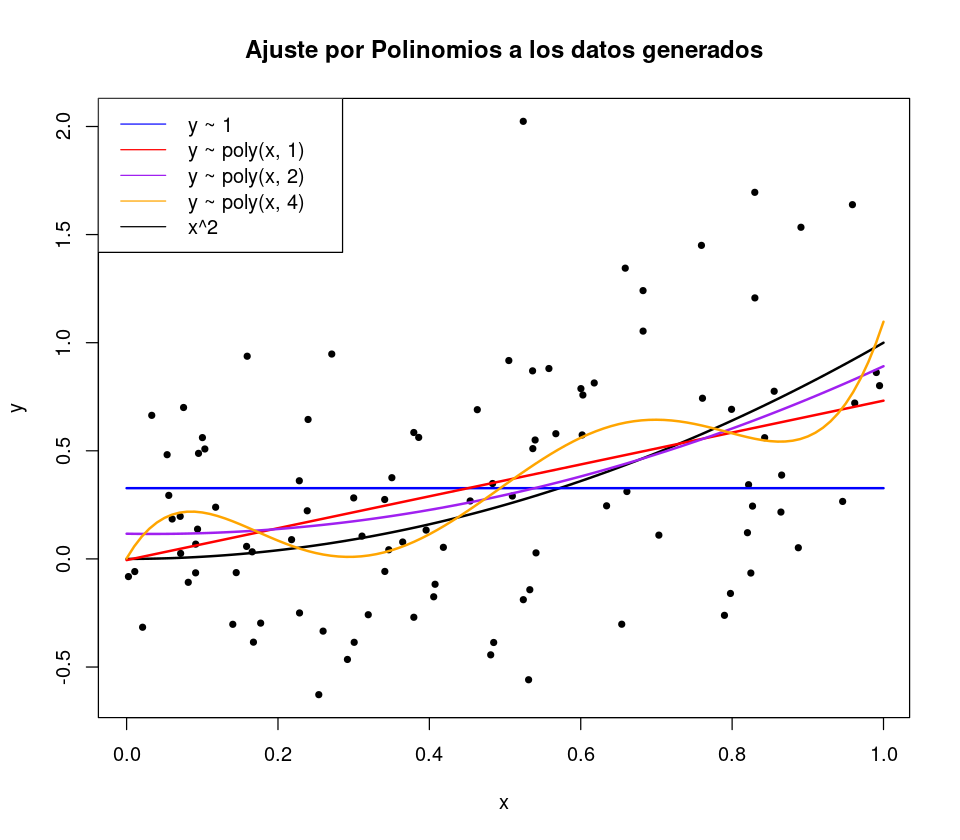

In [12]:
options(repr.plot.width=8, repr.plot.height=7)
plot(y ~ x, data = data_sint, col = "black", pch = 20,main = "Ajuste por Polinomios a los datos generados")
sec = seq(from = 0, to = 1, by = 0.01)
x=data.frame(x = sec)
lines(sec, f(sec), col = "black", lwd = 2)
lines(sec, predict(mod_0, x), col = "blue",  lwd = 2)
lines(sec, predict(mod_1, x), col = "red",   lwd = 2)
lines(sec, predict(mod_2, x), col = "purple", lwd = 2)
lines(sec, predict(mod_3, x), col = "orange",  lwd = 2)
legend("topleft", c("y ~ 1", "y ~ poly(x, 1)", "y ~ poly(x, 2)",  "y ~ poly(x, 4)", "x^2"), 
col = c("blue", "red", "purple", "orange", "black"), lty = c(1, 1, 1, 1, 1))

Lo siguiente es predecir el valor de $x=0.8$ con los diferentes modelos y estudiar su comportamiento en términos de sesgo y varianza.

In [13]:
simulaciones = 300  #numero de simulaciones
nomodelos    = 4 #numero de modelos
x = data.frame(x = 0.8) #punto en el que vamos a hacer predicciones
predicciones = matrix(0, nrow = simulaciones, ncol = nomodelos)

In [14]:
for (i in 1:simulaciones) {
   #generamos la data 
  data_sint = f_datos_sint(f)

  # hacemos el ajuste de los modelos
  mod_0 = lm(y ~ 1, data = data_sint)
  mod_1 = lm(y ~ poly(x, degree = 1), data = data_sint)
  mod_2 = lm(y ~ poly(x, degree = 2), data = data_sint)
  mod_3 = lm(y ~ poly(x, degree = 5), data = data_sint)

  # obtenemos las predicciones para cada modelo
  predicciones[i, 1] = predict(mod_0, x)
  predicciones[i, 2] = predict(mod_1, x)
  predicciones[i, 3] = predict(mod_2, x)
  predicciones[i, 4] = predict(mod_3, x)
}

In [15]:
#verificamos las predicciones
head(predicciones,3)

0.3106694,0.6254071,0.6302181,0.6266303
0.3208283,0.7347205,0.7384946,0.9645878
0.3847578,0.7171456,0.7240621,0.7784315


In [16]:
sesgo = function(estimado, valorverdadero) {
  mean(estimado) - valorverdadero
}
varianza = function(estimado) {
  mean((estimado - mean(estimado)) ^ 2)
}
sesgomodelos    = apply(predicciones, 2, sesgo, valorverdadero = f(x = 0.8))
varianzamodelos = apply(predicciones, 2, varianza)
print("y ~ 1        y ~ poly(x, 1)      y ~ poly(x, 2)      y ~ poly(x, 5)")
print("Sesgo")
sesgomodelos
print("Varianza")
varianzamodelos

[1] "y ~ 1        y ~ poly(x, 1)      y ~ poly(x, 2)      y ~ poly(x, 5)"
[1] "Sesgo"


[1] -0.306663453 -0.009345310 -0.002367380  0.005032098

[1] "Varianza"


[1] 0.003369879 0.005175764 0.005151368 0.012285750

fig <- plot_ly(y =predicciones[,1] , type = "box",boxmean=TRUE, name= "y ~ 1")
fig <- fig %>% add_trace(y =predicciones[,2],boxmean=TRUE,  name= "y ~ poly(x, 1)")
fig <- fig %>% add_trace(y =predicciones[,3], boxmean=TRUE, name= "y ~ poly(x, 2)")
fig <- fig %>% add_trace(y = predicciones[,4],boxmean=TRUE,name="y ~ poly(x, 4)")
#fig <- fig %>% layout(title = "Boxplot para los diferentes grados del polinomio")
ggplotly(fig)

In [62]:
fit.data<- as.data.frame(predicciones)%>% setNames(c("poly_0","poly_1","poly_2","poly_4"))
data <- stack(fit.data)

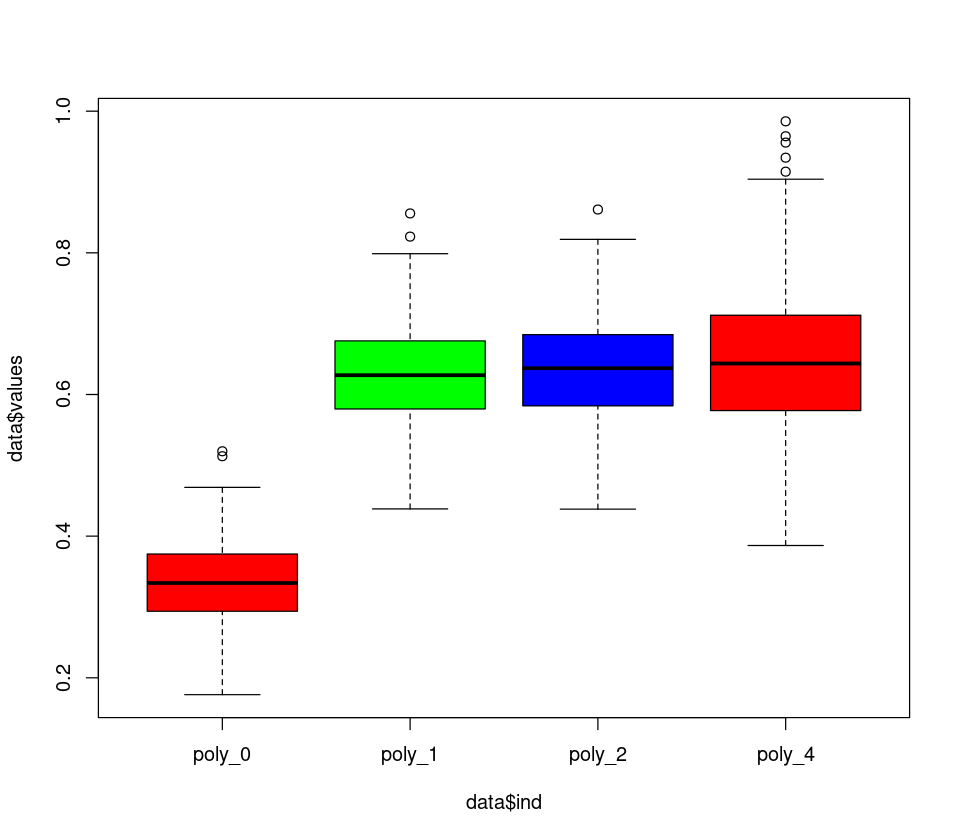

In [65]:
boxplot(data$values ~ data$ind,
        col = rainbow(ncol(trees)))

De aquí podriamos obtener la siguiente observación:
Mientras mayor es el grado del polinomio estamos más cerca estamos del verdadero valor $f(0.8)=0.64$ sin embargo la varianza incrementa. 
1. Muy pocas covariables conducen a un elevado sesgo esto es llamado subajuste(underfitting)
2. Demasiadas covariables hacen que la varianza incremente llamado sobreajuste(overfitting)

Buenas predicciones resultan de un buen balance entre varianza y sesgo.